**Построение модели прогнозирования оттока клиентов из компании** <br>
В файле для трейна собраны данные по фактическому оттоку клиентов из компании за 3 месяца (month_number). <br>
Необходимо построить модель, которая будет прогнозировать значение целевой переменной 'churn'.

In [ ]:
import pandas as pd              # Импорт библиотеки Pandas
import numpy as np               # Импорт библиотеки Numpy
import seaborn as sns            # Импорт библиотеки Seaborn
import matplotlib.pyplot as plt  # Импорт библиотеки Matplotlib

In [ ]:
data = pd.read_csv('churn_train.txt', delimiter='\t')  # Открытие файла с данными
data.head()

,client_id,month_number,age,lifetime,beh_score,region,channel,avg_transaction_sum,total_products,deposit,is_package,salary_bucket,churn
0,20201,2,38,21,"2,73",Moscow,Online,345,1,1,1,70000.0,0
1,42943,2,30,21,"2,80",Moscow,Branch,269,1,1,1,30000.0,0
2,27570,1,48,13,"2,80",Regions,Online,327,1,1,1,150000.0,1
3,25037,3,40,15,"2,68",Moscow,Online,0,1,1,1,30000.0,0
4,47546,2,20,21,"2,88",Saint-Petersbourgh,Branch,0,1,1,0,190000.0,0


In [ ]:
# Меняем запятые на точки в столбце 'beh_score'
data['beh_score'] = data['beh_score'].str.replace(',', '.').astype(float)

In [ ]:
# Проверка пропущенных значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8305 entries, 0 to 8304
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   client_id            8305 non-null   int64  
 1   month_number         8305 non-null   int64  
 2   age                  8305 non-null   int64  
 3   lifetime             8305 non-null   int64  
 4   beh_score            8305 non-null   float64
 5   region               8305 non-null   object 
 6   channel              8305 non-null   object 
 7   avg_transaction_sum  8305 non-null   int64  
 8   total_products       8305 non-null   int64  
 9   deposit              8305 non-null   int64  
 10  is_package           8305 non-null   int64  
 11  salary_bucket        8304 non-null   float64
 12  churn                8305 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 843.6+ KB


In [ ]:
# Вычисляем среднее значение столбца 'salary_bucket' без учета NaN
mean_value = data['salary_bucket'].mean()

# Заполняем пустые значения средним значением
data['salary_bucket'] = data['salary_bucket'].fillna(mean_value)

In [ ]:
# Проверка пропущенных значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8305 entries, 0 to 8304
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   client_id            8305 non-null   int64  
 1   month_number         8305 non-null   int64  
 2   age                  8305 non-null   int64  
 3   lifetime             8305 non-null   int64  
 4   beh_score            8305 non-null   float64
 5   region               8305 non-null   object 
 6   channel              8305 non-null   object 
 7   avg_transaction_sum  8305 non-null   int64  
 8   total_products       8305 non-null   int64  
 9   deposit              8305 non-null   int64  
 10  is_package           8305 non-null   int64  
 11  salary_bucket        8305 non-null   float64
 12  churn                8305 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 843.6+ KB


In [ ]:
# Получение базовых статистик
data.describe()

,client_id,month_number,age,lifetime,beh_score,avg_transaction_sum,total_products,deposit,is_package,salary_bucket,churn
count,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000,8305.000000
mean,30030.098013,2.001686,39.411680,17.026008,2.808682,218.339675,1.534377,0.704034,0.517760,99926.541426,0.266827
std,11554.802567,0.810722,10.519373,2.897835,0.066423,169.282031,0.579062,0.456503,0.499715,57529.475555,0.442328
min,10005.000000,1.000000,18.000000,12.000000,2.540000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,20064.000000,1.000000,32.000000,15.000000,2.770000,0.000000,1.000000,0.000000,0.000000,50000.000000,0.000000
50%,30069.000000,2.000000,38.000000,17.000000,2.810000,311.000000,1.000000,1.000000,1.000000,100000.000000,0.000000
75%,39738.000000,3.000000,44.000000,20.000000,2.860000,358.000000,2.000000,1.000000,1.000000,150000.000000,1.000000
max,49997.000000,3.000000,92.000000,22.000000,2.930000,501.000000,4.000000,1.000000,1.000000,200000.000000,1.000000


In [ ]:
# Получение статистики по нецифровым данным
data.describe(include=[object])

,region,channel
count,8305,8305
unique,3,2
top,Moscow,Online
freq,4163,4537


In [ ]:
# Удаление признака с ID клиента
del data['client_id']

array([[<Axes: title={'center': 'month_number'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'lifetime'}>],
       [<Axes: title={'center': 'beh_score'}>,
        <Axes: title={'center': 'avg_transaction_sum'}>,
        <Axes: title={'center': 'total_products'}>],
       [<Axes: title={'center': 'deposit'}>,
        <Axes: title={'center': 'is_package'}>,
        <Axes: title={'center': 'salary_bucket'}>],
       [<Axes: title={'center': 'churn'}>, <Axes: >, <Axes: >]],
      dtype=object)

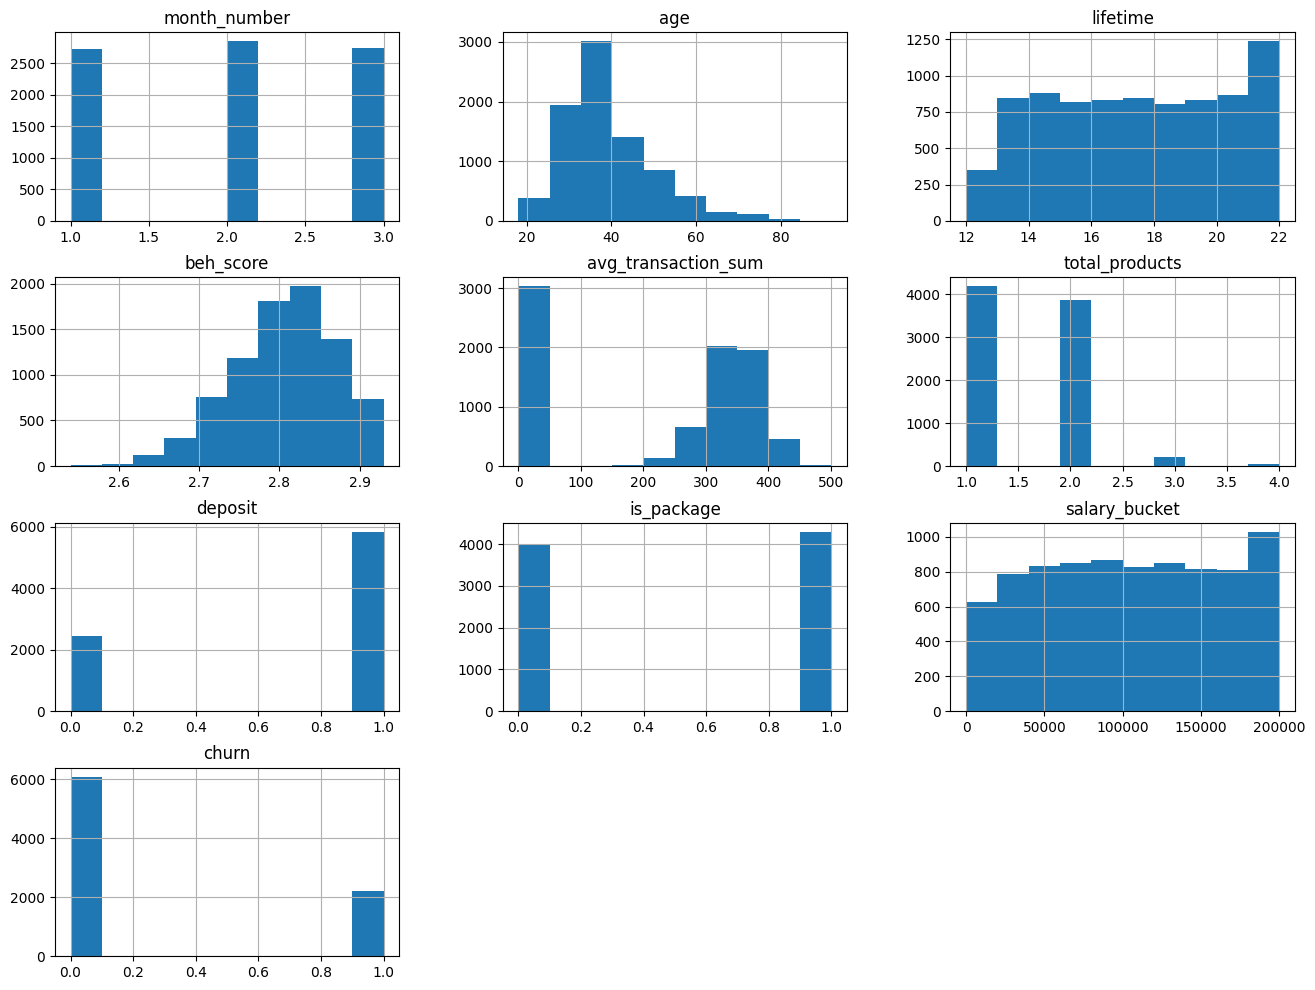

In [ ]:
# Выведем инфографику числовых признаков
data.hist(figsize=(16, 12))

In [ ]:
# Для разбиения на классы воспользуемся автоматическим алгоритмом:
def classificator(data_frame):  # Определяем функицю
    for feature in list(data_frame.columns):      # Задаем итератор в рамках названий колонок
        if data_frame[feature].dtype == 'O':      # Условие для признаков соответсвующих типу данных 'Object'
            for iteration, value in enumerate(list(data_frame[feature].unique())):  # Итератор в рамках уникальных значений признака
                if type(value) == str:         # Условие для замены нечисловых значений
                    if data_frame[feature].nunique() > 2:  # Условие компенсации порядкового номера для
                        iteration += 1                     # городов
                    data_frame[feature].replace(value, iteration, inplace=True)  # Замена всех нечисловых значений на соответствующий порядковый номер
data_new = data.copy()
classificator(data_new)
data_new

,month_number,age,lifetime,beh_score,region,channel,avg_transaction_sum,total_products,deposit,is_package,salary_bucket,churn
0,2,38,21,2.73,1,0,345,1,1,1,70000.0,0
1,2,30,21,2.80,1,1,269,1,1,1,30000.0,0
2,1,48,13,2.80,2,0,327,1,1,1,150000.0,1
3,3,40,15,2.68,1,0,0,1,1,1,30000.0,0
4,2,20,21,2.88,3,1,0,1,1,0,190000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8300,2,74,12,2.81,1,1,349,1,1,1,160000.0,0
8301,2,32,13,2.78,2,1,344,1,1,1,180000.0,0
8302,1,34,17,2.74,3,0,357,1,0,1,120000.0,0
8303,3,42,20,2.66,1,0,272,3,1,1,190000.0,1


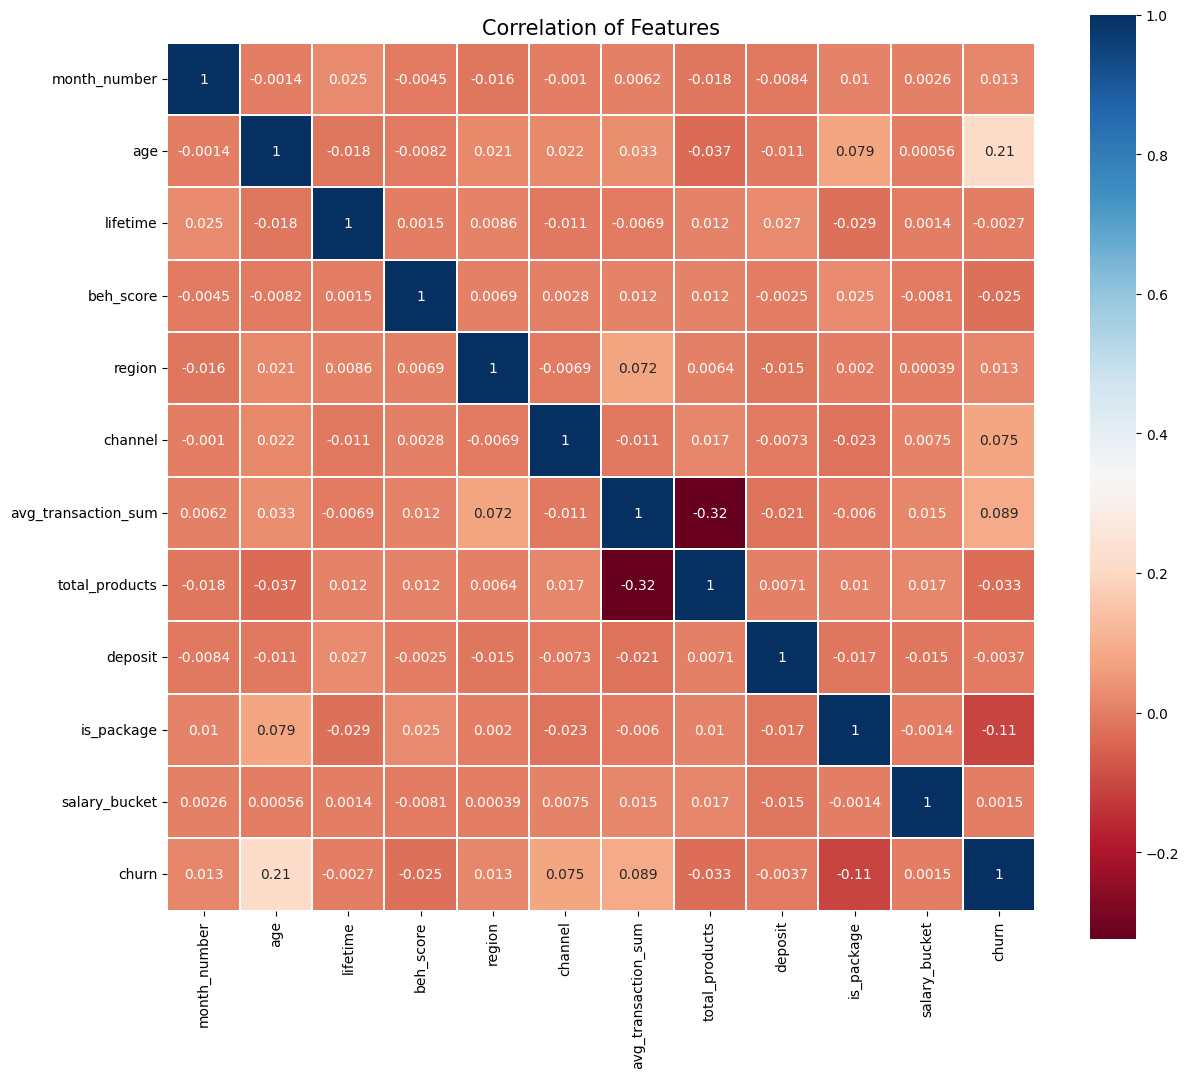

In [ ]:
# Посмотрим на корреляционные связи между признаками
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1, size=15)
sns.heatmap(data_new.corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True, fmt='.2g')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # Импорт классификатора "k-ближайших соседей"
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier # Импорт классификатора "Градиентный бустинг" и "Случайный лес"
from sklearn.linear_model import LogisticRegression  # Импорт классификатора "Логистическая регрессия"

# Импорт методов автоматической обработки данных
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

# Импорт метрик качества классификации
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score

In [ ]:
# Параметры базовых алгоритмов
knn_params = {'n_neighbors' : np.arange(1, 10, 1)}  # Параметры для классификатора KNeighborsClassifier

gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)}   # Параметры для классификатора GradientBoostingClassifier

rfc_params = {'n_estimators': range(10, 100, 10),  # Параметры для классификатора RandomForestClassifier
              'min_samples_leaf': range(1, 7)}

lr_params = {'C': np.arange(0.2, 1, 0.1)} # Параметры для классификатора LogisticRegression

skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=17) # Параметры для кросс-валидации

In [ ]:
# Разделение данных на тренировочные и тестовые
y = data_new['churn']
x = data_new[['month_number', 'age', 'lifetime', 'beh_score', 'region', 'channel', 'avg_transaction_sum', 'total_products', 'deposit', 'is_package', 'salary_bucket']]

In [ ]:
# Посмотрим на балансировку целевого признака
print('Положительных значений -', y.sum())
print('Отрицательных значений -', y.count() - y.sum())

Положительных значений - 2216
Отрицательных значений - 6089


In [ ]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  stratify=y, random_state=17)

In [ ]:
# GridSearch для каждой из моделей

knn = KNeighborsClassifier()                       # Определение объекта классификатора KNeighborsClassifier
gbc = GradientBoostingClassifier(random_state=17)  # Определение объекта классификатора GradientBoostingClassifier
rfc = RandomForestClassifier(random_state=17)      # Определение объекта классификатора RandomForestClassifier
lr = LogisticRegression(random_state=17,
                        class_weight = 'balanced',
                        solver = 'liblinear')      # Определение объекта классификатора LogisticRegression

gscv_knn = GridSearchCV(estimator=knn, param_grid=knn_params, cv=skf)  # Определение объекта кросс-валидации для KNeighborsClassifier
gscv_gbc = GridSearchCV(estimator=gbc, param_grid=gbc_params, cv=skf)  # Определение объекта кросс-валидации для GradientBoostingClassifier
gscv_rfc = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv=skf)  # Определение объекта кросс-валидации для RandomForestClassifier
gscv_lr = GridSearchCV(estimator=lr, param_grid=lr_params, cv=skf)     # Определение объекта кросс-валидации для LogisticRegression

knn_model = gscv_knn.fit(X_train, y_train)  # Обучение модели KNeighborsClassifier на кросс-валидации
gbc_model = gscv_gbc.fit(X_train, y_train)  # Обучение модели GradientBoostingClassifier на кросс-валидации
rfc_model = gscv_rfc.fit(X_train, y_train)  # Обучение модели RandomForestClassifier на кросс-валидации
lr_model = gscv_lr.fit(X_train, y_train)    # Обучение модели LogisticRegression на кросс-валидации

In [ ]:
# Получение лучших параметров для классификаторов, полученных на кросс-валидации
print('Лучшие параметры:')
print(f'KNeighborsClassifier %s \nGradientBoostingClassifier %s \nRandomForestClassifier %s \nLogisticRegression %s' %(
                                                                gscv_knn.best_params_,
                                                                gscv_gbc.best_params_,
                                                                gscv_rfc.best_params_,
                                                                gscv_lr.best_params_))

Лучшие параметры:
KNeighborsClassifier {'n_neighbors': 6} 
GradientBoostingClassifier {'learning_rate': 0.1} 
RandomForestClassifier {'min_samples_leaf': 3, 'n_estimators': 60} 
LogisticRegression {'C': 0.8000000000000003}


In [ ]:
# Получение прогнозов для каждой модели

knn_predict = knn_model.predict(X_test)
gbc_predict = gbc_model.predict(X_test)
rfc_predict = rfc_model.predict(X_test)
lr_predict = lr_model.predict(X_test)

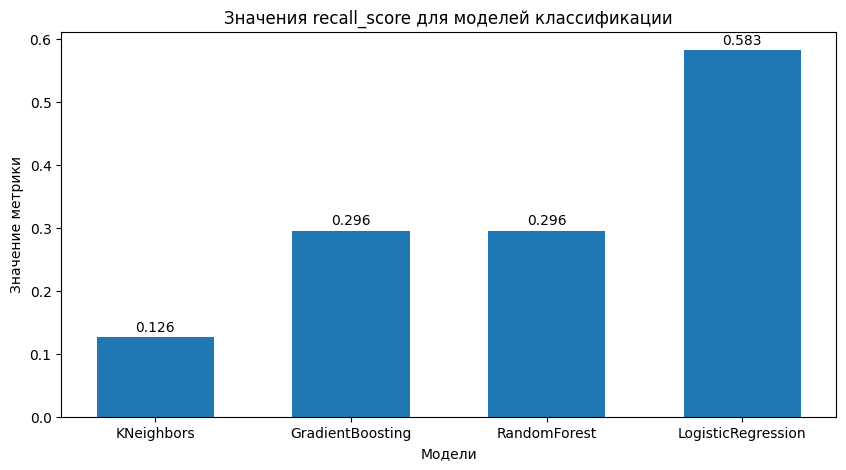

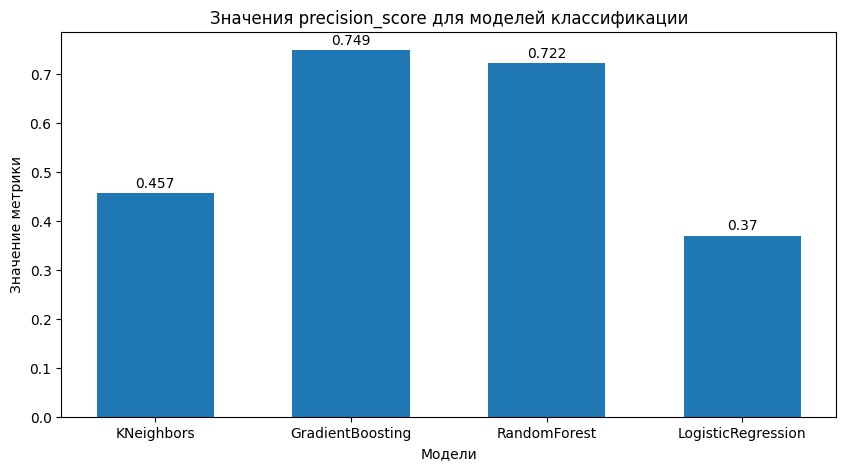

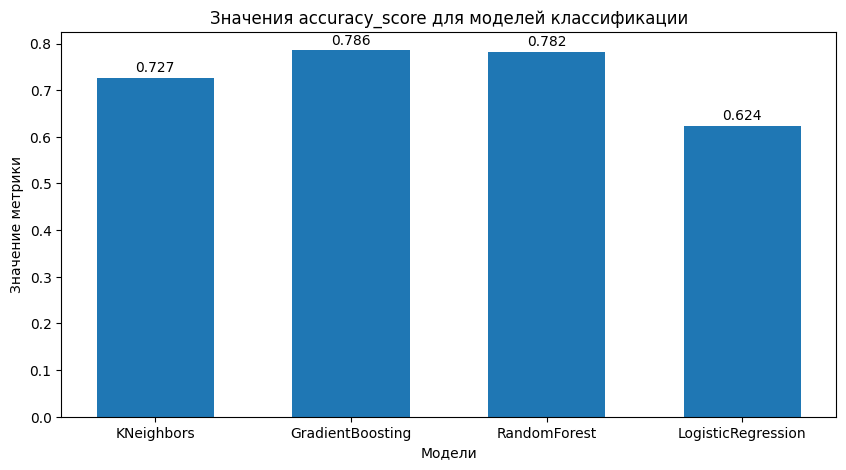

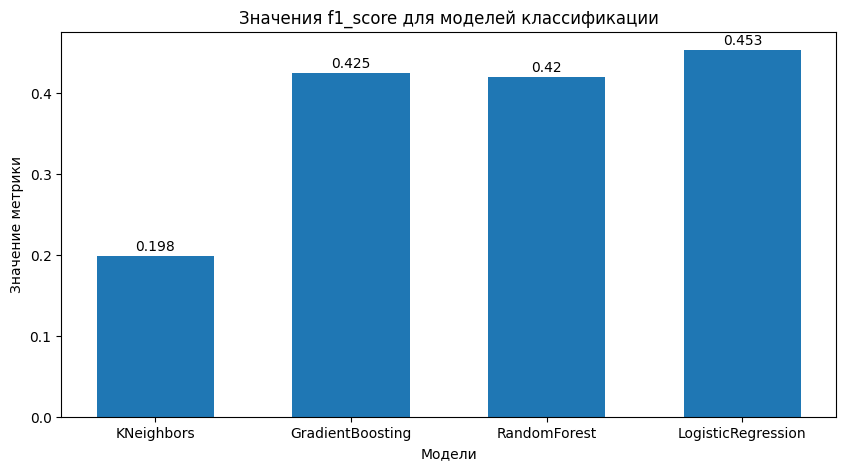

In [ ]:
# Получение значений метрик моделей классификаторов
metrics_scores = [recall_score, precision_score, accuracy_score, f1_score]
predicts = [knn_predict, gbc_predict, rfc_predict, lr_predict]
models_names = ['KNeighbors', 'GradientBoosting', 'RandomForest', 'LogisticRegression']
scores_names = ['recall_score', 'precision_score', 'accuracy_score', 'f1_score']
values_list = []
for i, score in enumerate(metrics_scores):
    for predict in predicts:
        values_list.append(round(score(y_test, predict),3))

    x = np.arange(len(models_names))  # Список координат столбцов по x

    fig, ax = plt.subplots(figsize=(10,5))  # Определение фигуры и осей
    rects = ax.bar(x, values_list, 0.6)  # Определение колонок для данных

    # Указание подписей для осей, таблицы, легенды
    ax.set_ylabel('Значение метрики')
    ax.set_xlabel('Модели')
    ax.set_title(f'Значения {scores_names[i]} для моделей классификации')
    ax.set_xticks(x)
    ax.set_xticklabels(models_names)

    # Определение функции для отображения столбцов с аннотациями
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            # Задание параметров для аннотаций
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height), # Получение точек координат для текста
                        xytext=(0, 2),    # Высота текста над столбцами
                        # Расположение текста относительно столбцов
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects)  # Выполнение функции
    values_list = []

plt.show()

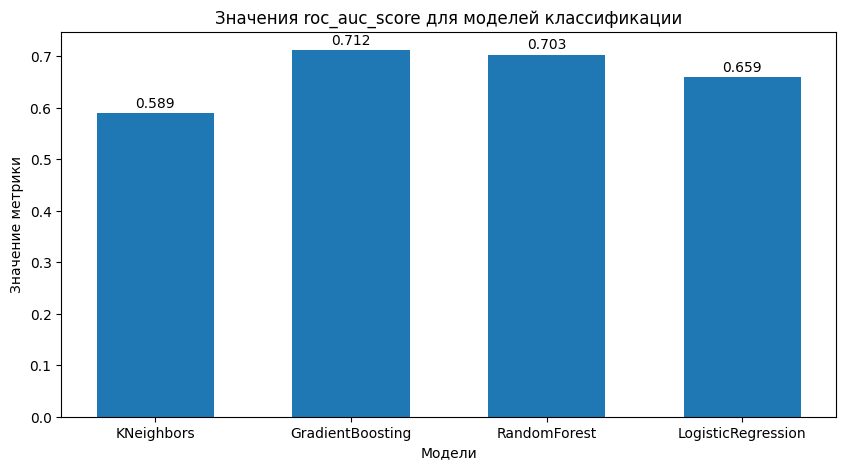

In [ ]:
# Получение значений ROC-AUC score для моделей классификаторов

auc_list = []
models = [knn_model, gbc_model, rfc_model, lr_model]
for model in models:
    proba = model.predict_proba(X_test)
    auc_list.append(round(roc_auc_score(y_test, proba[:, 1]),3))

x = np.arange(len(models_names))  # Список координат столбцов по x

fig, ax = plt.subplots(figsize=(10,5))  # Определение фигуры и осей
rects = ax.bar(x, auc_list, 0.6)  # Определение колонок для данных

# Указание подписей для осей, таблицы, легенды
ax.set_ylabel('Значение метрики')
ax.set_xlabel('Модели')
ax.set_title('Значения roc_auc_score для моделей классификации')
ax.set_xticks(x)
ax.set_xticklabels(models_names)

# Определение функции для отображения столбцов с аннотациями
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        # Задание параметров для аннотаций
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height), # Получение точек координат для текста
                    xytext=(0, 2),    # Высота текста над столбцами
                    # Расположение текста относительно столбцов
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)  # Выполнение функции
values_list = []

plt.show()

**Выбор модели машинного обучения**: В ходе сравнения четырех алгоритмов (k-ближайших соседей, градиентный бустинг, случайный лес, логистическая регрессия) для прогноза оттока клиентов был выбран градиентный бустинг ввиду его лучших показателей на большинстве метрик.

**Профиль склонного к оттоку клиента (его отличительные особенности)**: <br>
1) Зрелого или преклонного возраста, <br>
2) Не подключен к пакетам услуг, <br>
3) Не пользуется банком онлайн, <br>
4) В среднем тратит много денег.